In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
dataframe = pd.read_csv(filepath_or_buffer = "/Users/felipe.caicedo/Documents/archive/framingham.csv")
dataframe.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
dataframe.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
dataframe[['age','education']].head()

,age,education
0,39,4.0
1,46,2.0
2,48,1.0
3,61,3.0
4,46,3.0


<Axes: xlabel='age', ylabel='education'>

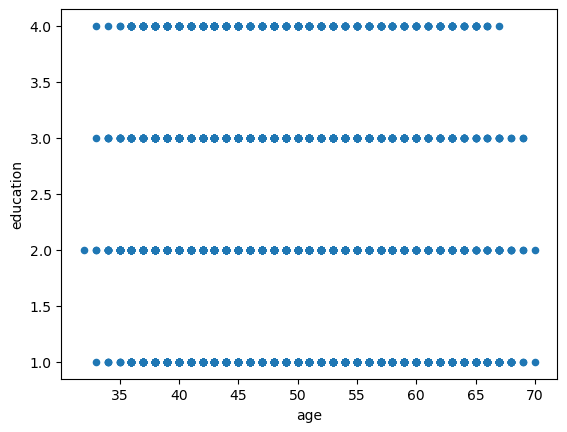

In [77]:
#grafica de puntos
dataframe[['age','education']].plot.scatter(x ='age',y ='education')

In [78]:
# pintar funcion logistica
#pruebas de parametros
w = 0.09
b = -3.6
#puntos de la recta
x = np.linspace(0,dataframe['age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

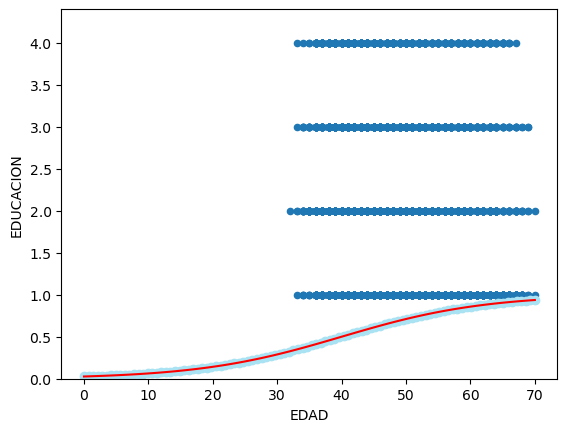

In [76]:
# grafica de la recta
dataframe.plot.scatter(x='age',y='education')
plt.plot(x,y, color='red')
plt.ylim(0,dataframe['education'].max()*1.1)
plt.scatter(x,y, color='#A9E2F3')
# plt.grid()
plt.xlabel("EDAD")
plt.ylabel("EDUCACION")
plt.show()

In [35]:
#predicciones
dataframe['sigmoid'] = 1/(1+np.exp(-(dataframe['age']*w+b)))

In [37]:
#  funcion de error
dataframe['loss_xi'] = -dataframe['education']*np.log(dataframe['sigmoid'])-(1-dataframe['education'])*np.log(1-dataframe['sigmoid'])
cost_j = dataframe['loss_xi'].mean()
cost_j

-0.2996578400723453

In [39]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])
df['w'] = np.round(df['w'], 8)
df['b'] = np.round(df['b'], 8)

In [41]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [75]:
dataframe.value_counts().sort_index()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD  sigmoid   loss_xi  
0     32   2.0        1              15.0        0.0     0                0             0         242.0    111.0  70.0   29.84  80.0       88.0     0           0.327393   1.836594    1
      33   1.0        0              0.0         0.0     0                0             0         158.0    108.0  67.0   19.84  86.0       69.0     0           0.347511   1.056960    1
           2.0        1              5.0         0.0     0                0             0         200.0    119.0  74.0   23.80  75.0       74.0     0           0.347511   1.686960    1
           3.0        1              15.0        0.0     0                0             0         199.0    116.0  81.0   21.61  75.0       93.0     0           0.347511   2.316960    1
      34   1.0        1              20.0        0.0     0                0     

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>],
       [<Axes: title={'center': 'sigmoid'}>,
        <Axes: title={'center': 'loss_xi'}>, <Axes: >, <Axes: >]],
      dtype=object)

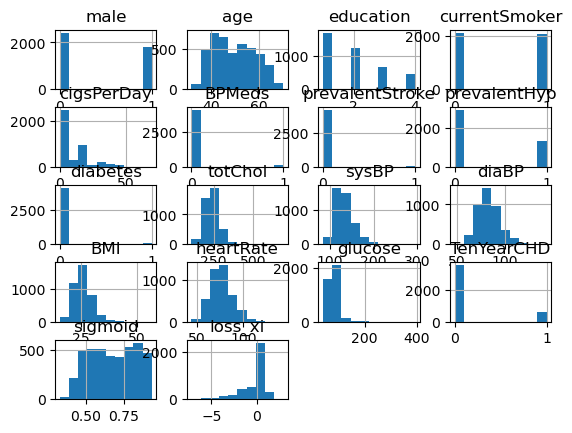

In [64]:

dataframe.hist()

In [73]:
cantidad_education = dataframe.groupby(['education']).count()['age']

In [79]:

cantidad_education

education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: age, dtype: int64